# Теория вероятностей и математическая статистика
## Урок 10. Дисперсионный анализ

In [1]:
import numpy as np
import scipy.stats as stats

**Задача 1**  
Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов.

Даны значения роста в трех группах случайно выбранных спортсменов:

Футболисты: 173, 175, 180, 178, 177, 185, 183, 182.

Хоккеисты: 177, 179, 180, 188, 177, 172, 171, 184, 180.

Штангисты: 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170.

In [2]:
# Функция однофакторного дисперсионного анализа для 3 показателей
def analysis_of_variance(y1, y2, y3):
    k = 3
    n = len(y1) + len(y2) + len(y3)
    
    # Средние значения для каждого показателя
    y_mean_1 = np.mean(y1)
    y_mean_2 = np.mean(y2)
    y_mean_3 = np.mean(y3)
    
    # Общее среднее
    total = np.hstack((y1, y2, y3))
    y_mean_total = np.mean(total)
    
    # Сумма квадратов отклонений наблюдений от общего среднего
    S_total = np.sum((total - y_mean_total)**2)
    
    # Сумма квадратов отклонений средних групповых значений от общего среднего
    S_f = np.sum((y_mean_1 - y_mean_total)**2) * len(y1) + \
            np.sum((y_mean_2 - y_mean_total)**2) * len(y2) + \
            np.sum((y_mean_3 - y_mean_total)**2) * len(y3)
    
    # Остаточная сумма квадратов отклонений
    S_ost = np.sum((y1 - y_mean_1)**2) + \
            np.sum((y2 - y_mean_2)**2) + \
            np.sum((y3 - y_mean_3)**2) 
            
    # Факторная дисперсия
    D_f = S_f / (k - 1)
    
    # Остаточная дисперсия
    D_ost = S_ost / (n - k)
    
    # Критерий Фишера
    return D_f / D_ost

In [3]:
football = np.array([173, 175, 180, 178, 177, 185, 183, 182])
hockey = np.array([177, 179, 180, 188, 177, 172, 171, 184, 180])
barbell = np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170])

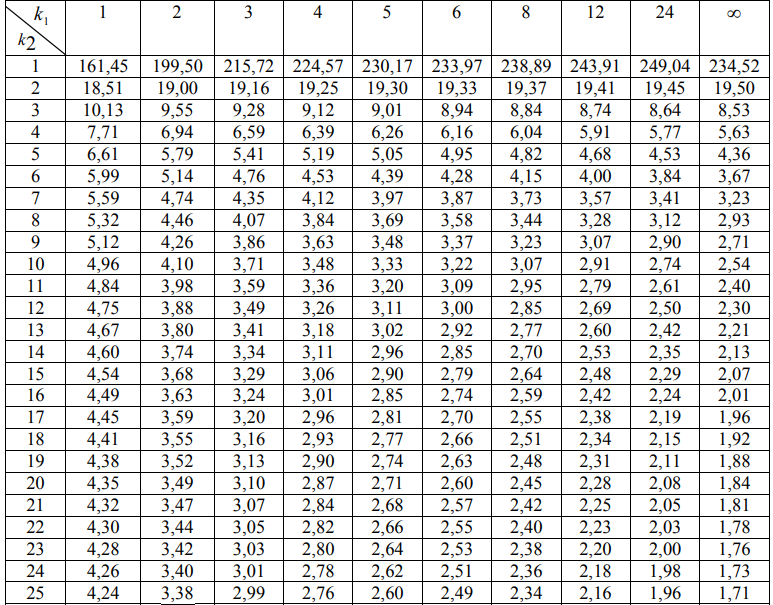

Табличное значение критерия Фишера = 3,38

In [4]:
analysis_of_variance(football, hockey, barbell)

5.500053450812598

**Ответ:**  
F_n > F_t, значит мы принимаем гипотезу H1 - статистически значимые различия среднего роста среди взрослых футболистов, хоккеистов и штангистов есть